# **Wine Project**

## **Probelm Statement : To check the quality of wine**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# import data
df = pd.read_csv('/content/sample_data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 - There is no null values looks like.

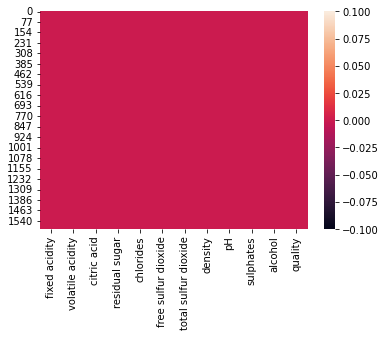

In [ ]:
import seaborn as sns

sns.heatmap(df.isna())

# **Plot Heatmap**

 - Let's see if we can reduce features.
 - Let's see the coefficient of multicollinearity.

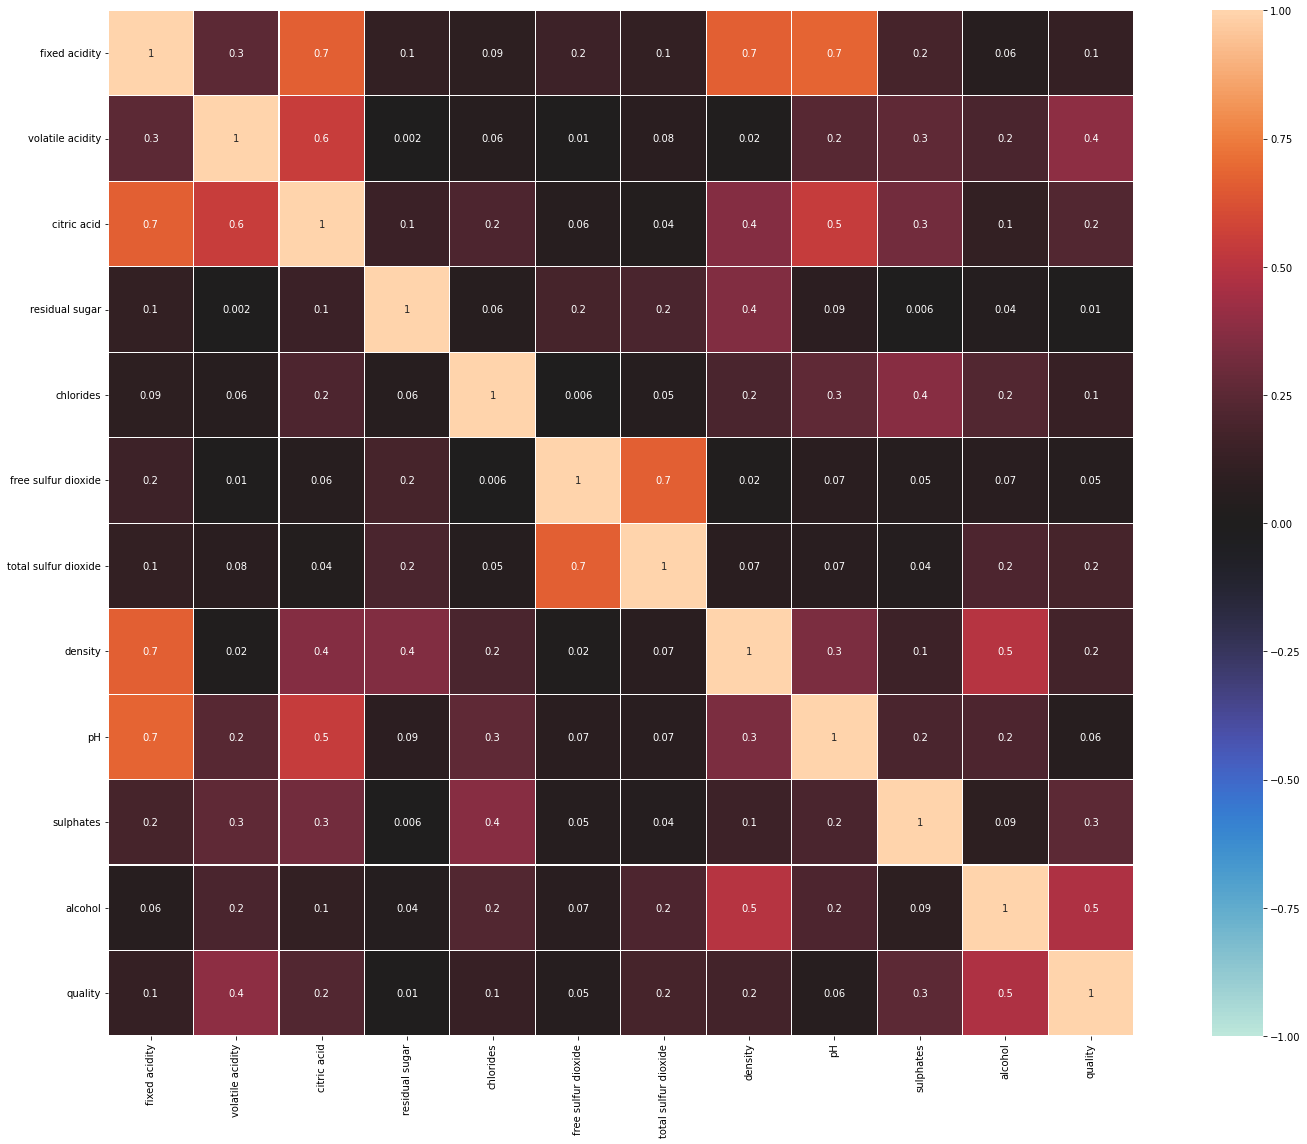

In [ ]:
import matplotlib.pyplot as plt

df_corr = df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmax=1,vmin=-1,annot=True,fmt='0.1g',linewidths=0.1,center=0,square=True)
plt.tight_layout()

 - Those which are darken in color means that not much correlated.
 - Those which are lighten means highly correlated.
 - Moderate means 50-60% correlated.
 As I can see in the abore plotted heatmap.


# **Train Test Split**

In [ ]:
x = df.drop(columns=['quality'])
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=41)

In [ ]:
# let's visuaize data without any preprocessing
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [ ]:
pred = clf.predict(x_test)

In [ ]:
clf.score(x_test,y_test)

0.6325

## **How to understand Confusion Matrix for multi class**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[  1,   1,   0,   0,   1,   0],
       [  2,   1,   5,   3,   0,   0],
       [  1,   7, 111,  34,   4,   0],
       [  0,   5,  31, 107,  21,   4],
       [  0,   0,   7,  17,  32,   1],
       [  0,   0,   1,   1,   1,   1]])

In [ ]:
pd.DataFrame(confusion_matrix(y_test,pred),columns=['Q3','Q4','Q5','Q6','Q7','Q8'],index=['Q3','Q4','Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,1,1,0,0,1,0
Q4,2,1,5,3,0,0
Q5,1,7,111,34,4,0
Q6,0,5,31,107,21,4
Q7,0,0,7,17,32,1
Q8,0,0,1,1,1,1


 - lets do hyper parameter tuning.

In [ ]:
grid_param = {
              'criterion' : ['gini','entropy'],
              'max_depth' : range(3,12,2),
              'min_samples_leaf' : range(2,15,2),
              'min_samples_split' : range(1,10,2)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = clf,
                           param_grid = grid_param,
                           cv = 5)

In [ ]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 3}


In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 16, min_samples_split = 3)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6

Let's visualize the tree

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
#import Image

feature_name = list(x.columns)
class_name = list(y_train.unique())
# create a dot file which stores the tree structure.
dot_data = export_graphviz(clf,rounded=True,filled=True)
# draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_hype.png')
# show graph
Image(graph.create_png())

NameError: ignored

try to know how this Image works. this is giving error.